<a href="https://colab.research.google.com/github/Saidul-1/CSE4132-Artificial-Intelligence-Lab/blob/main/Assighment12%2C13%2C14_Effect_of_different_Augmentation_in_my_CNN_Binary_Classifier_Lichi%26Mahogany_leaf.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

12. Write a report by discussing the effect of different data augmentation techniques on your
CNN based classifiers.
13. Show the effect of dropout layer, data augmentation techniques on overfitting issues of
your CNN based classifier.
14. Write a report by discussing the effect of the following issues on the classifier’s
performance:
* different activation functions in hidden layers
* different loss functions

In [ ]:
from tensorflow.keras.layers import Input, Dense, Flatten, Conv2D, MaxPooling2D, RandomFlip, RandomRotation, RandomZoom, RandomBrightness, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np
import time

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
def preprocess_dataset():
  dataset = np.load('/content/drive/MyDrive/leaf_binary_dataset.npz')
  trainX = dataset['trainX']
  trainY = dataset['trainY']
  testX = dataset['testX']
  testY = dataset['testY']

  trainX = trainX.astype('float32')/255.0
  testX = testX.astype('float32')/255.0

  trainY = to_categorical(trainY, 2)
  testY = to_categorical(testY, 2)

  return (trainX, trainY), (testX, testY)

In [ ]:
def build_model(input_shape):
  inputs = Input(input_shape)

  activation = 'tanh'
  loss = 'categorical_crossentropy'
  # Augmentation
  x = RandomFlip()(inputs)
  x = RandomRotation(0.2)(x)
  x = RandomZoom(0.1)(x)

  x = Conv2D(32, (3, 3), activation=activation)(inputs)
  x = MaxPooling2D((2, 2))(x)
  x = Conv2D(64, (3, 3), activation=activation)(x)
  x = MaxPooling2D((2, 2))(x)
  x = Conv2D(128, (3, 3), activation=activation)(x)
  x = MaxPooling2D((2, 2))(x)
  x = Flatten()(x)
  x = Dense(128, activation=activation)(x)

  x = Dropout(.5)(x)
  outputs = Dense(2, activation = 'sigmoid')(x)

  model = Model(inputs, outputs)
  model.summary(show_trainable=True)
  model.compile(optimizer=Adam(learning_rate=0.0001), loss=loss, metrics=['accuracy'])

  return model

In [ ]:
def train_model(my_model, trainX, trainY, training_epochs):
  history = my_model.fit(
      trainX, trainY,
      validation_split = 0.2,
      epochs = training_epochs,
  )
  return history

In [ ]:
def plot_history(history):
    plt.figure(figsize=(12, 4))

    # Plot Accuracy
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Val Accuracy')
    plt.title('Epoch vs Accuracy')
    plt.legend()

    # Plot Loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Val Loss')
    plt.title('Epoch vs Loss')
    plt.legend()

    plt.show()

In [ ]:
def sample_prediction_plot(testX, testY_labels, predY_labels):
  class_names = ['Lichi_leaf', 'Mahogany_leaf']
  plt.figure(figsize=(10, 10))
  num_samples, rows, cols = 25, 5, 5
  for i in range(min(num_samples, len(testX))):
      plt.subplot(rows, cols, i+1)
      plt.axis('off')
      plt.imshow(testX[i])
      color = 'green' if(testY_labels[i] == predY_labels[i]) else 'red'
      plt.title(f'True: {class_names[testY_labels[i]]},\n Pred: {class_names[predY_labels[i]]}', color=color)
  plt.suptitle(f'Sample Predictions from Test Set')
  plt.tight_layout()
  plt.show()

In [ ]:
def main():
  (trainX, trainY), (testX, testY) = preprocess_dataset()
  print(trainX.shape)
  print(trainY.shape)

  model = build_model(trainX.shape[1:])

  start_train = time.time()
  history = train_model(model, trainX, trainY, 10)
  end_train = time.time()
  print(f'Training time: {end_train - start_train} seconds')

  plot_history(history)

  start_test = time.time()
  predY = model.predict(testX)
  end_test = time.time()
  test_time_per_sample = (end_test - start_test) / len(testX)
  print(f"Testing Time per Sample: {test_time_per_sample:.4f} seconds")

  predY_labels = np.argmax(predY, axis=1)
  testY_labels = np.argmax(testY, axis=1)
  sample_prediction_plot(testX, testY_labels, predY_labels)
  accuracy = accuracy_score(testY_labels, predY_labels)
  print(f'Accuracy: {accuracy}')

(1031, 224, 224, 3)
(1031, 2)


Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━┓
┃ Layer (type)                ┃ Output Shape          ┃    Param # ┃ Trai… ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━┩
│ input_layer_5 (InputLayer)  │ (None, 224, 224, 3)   │          0 │   -   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ conv2d_15 (Conv2D)          │ (None, 222, 222, 32)  │        896 │   Y   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ max_pooling2d_15            │ (None, 111, 111, 32)  │          0 │   -   │
│ (MaxPooling2D)              │                       │            │       │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ conv2d_16 (Conv2D)          │ (None, 109, 109, 64)  │     18,496 │   Y   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ max_pooling2d_16            │ (None, 54, 54, 64)    │          0 │   -   │
│ (MaxPooling2D)              │                       │            │       │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ conv2d_17 (Conv2D)          │ (None, 52, 52, 128)   │     73,856 │   Y   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ max_pooling2d_17            │ (None, 26, 26, 128)   │          0 │   -   │
│ (MaxPooling2D)              │                       │            │       │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ flatten_5 (Flatten)         │ (None, 86528)         │          0 │   -   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ dense_10 (Dense)            │ (None, 128)           │ 11,075,712 │   Y   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ dropout_5 (Dropout)         │ (None, 128)           │          0 │   -   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ dense_11 (Dense)            │ (None, 2)             │        258 │   Y   │
└─────────────────────────────┴───────────────────────┴────────────┴───────┘

 Total params: 11,169,218 (42.61 MB)

 Trainable params: 11,169,218 (42.61 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 9s 230ms/step - accuracy: 0.4830 - loss: 2.3317 - val_accuracy: 0.6715 - val_loss: 0.6458
Epoch 2/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 4s 64ms/step - accuracy: 0.6255 - loss: 0.6456 - val_accuracy: 0.7246 - val_loss: 0.6002
Epoch 3/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 2s 62ms/step - accuracy: 0.7026 - loss: 0.5760 - val_accuracy: 0.6763 - val_loss: 0.5973
Epoch 4/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 2s 62ms/step - accuracy: 0.7369 - loss: 0.5517 - val_accuracy: 0.6908 - val_loss: 0.5902
Epoch 5/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 2s 66ms/step - accuracy: 0.7509 - loss: 0.5262 - val_accuracy: 0.7343 - val_loss: 0.5428
Epoch 6/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 2s 69ms/step - accuracy: 0.7754 - loss: 0.4925 - val_accuracy: 0.7729 - val_loss: 0.5217
Epoch 7/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 2s 65ms/step - accuracy: 0.8500 - loss: 0.4170 - val_accuracy: 0.7633 - val_loss: 0.5134
Epoch 8/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 2s 63ms/step - accuracy: 0.8631 - loss: 0.3906 - val_accuracy: 0.7826 - 

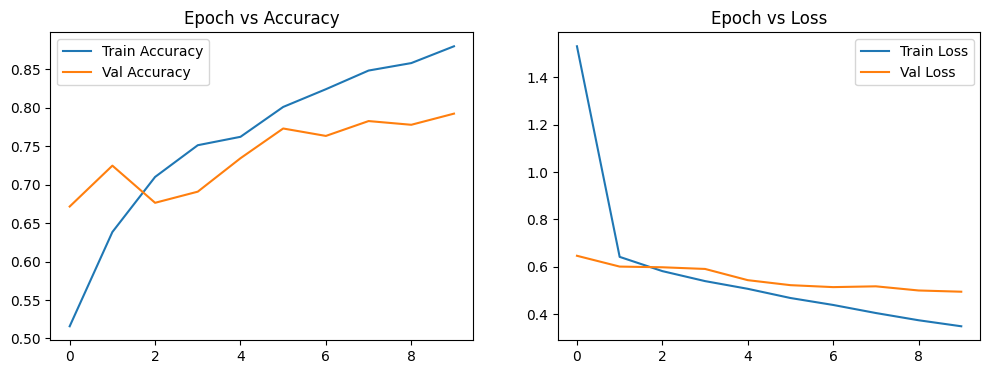

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 141ms/step
Testing Time per Sample: 0.0084 seconds


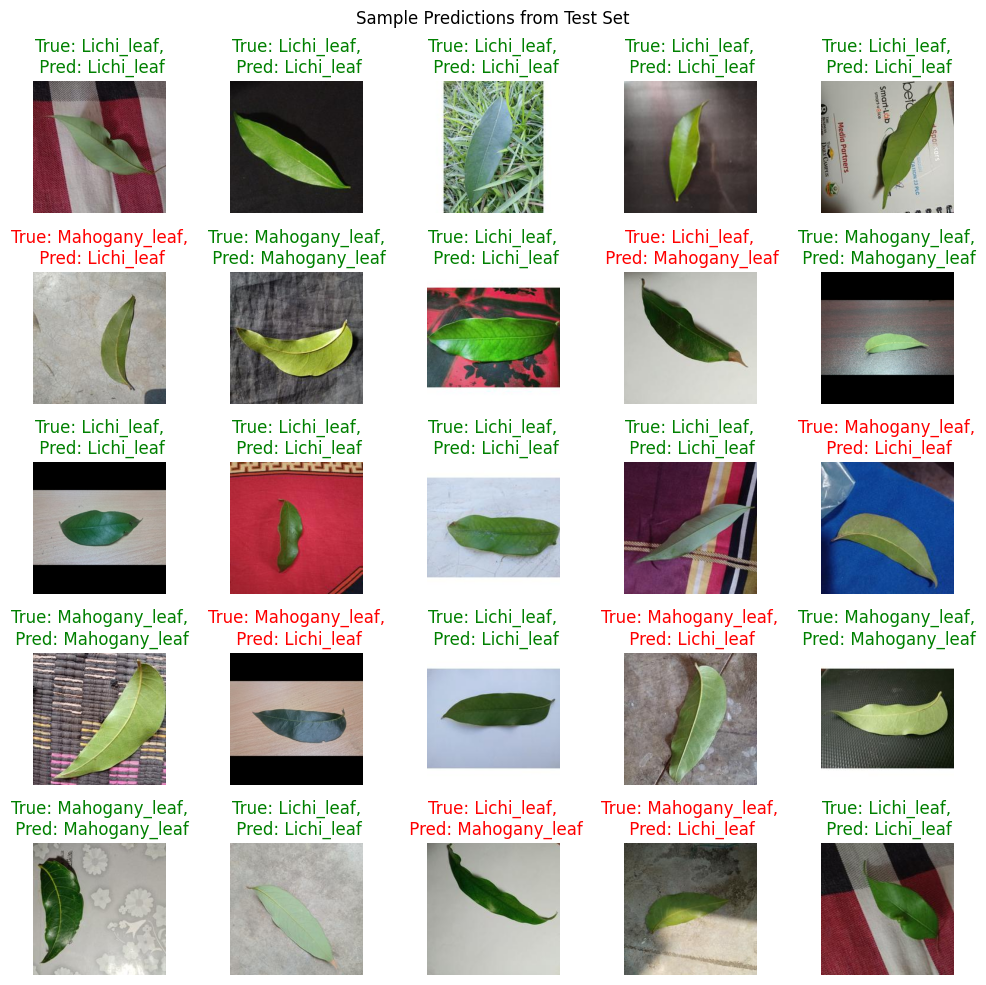

Accuracy: 0.6916666666666667


In [ ]:
if __name__ == '__main__':
    main()